# Insper - Modelagem e Simulação do Mundo Físico  

## Projeto 3 - Lançamento Oblíquo de uma Bola de Basquete com Rotação
---
---

In [1]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib import animation

---
---
# Modelos, validação e gráficos

---
---
## Modelo desconsiderando a rotação

---
### Código do modelo inicial com equações:

In [2]:
def modelo(lista, t):
    x, y, vx, vy = lista[0], lista[1], lista[2], lista[3]
    V = math.sqrt(vx ** 2 + vy ** 2)
     
    # Equações de posição
    dxdt = vx
    dydt = vy
  
    # Equações de velocidade
    dvxdt = (-1/m) * ((1/2) * pa * A * cd * V * vx)
    dvydt = ((1/m) * (pa * volume * g - (1/2) * A * cd * V * vy * pa)) - g
    
    if y < 0:
        return [0, 0, 0, 0]
    
    lista_return = [dxdt, dydt, dvxdt, dvydt]
    return lista_return

---
### Definindo parâmetros iníciais e rodando odeint:

In [3]:
# Parâmetros
dt = 3 * 10 ** -3
lista_tempo = np.arange(0, 10, dt)

# A massa, o A, a distancia e o raio são medidas minhas que provavelmente estão erradas
raio = 0.11
m = 0.4
A = math.pi * raio ** 2
pa = 1.225 # Densidade do ar
cd = 0.47 # Coeficiente de arrasto de uma esfera
distancia = 17.5 # Distância entre a trave e o escanteio
g = 9.81
pb = 2
volume = 4 / 3 * math.pi * raio ** 3

# Condições iniciais
x0 = 0
vx0 = 15
y0 = 0
vy0 = 15
ci = [x0, y0, vx0, vy0]

odeint_modelo = odeint(modelo, ci, lista_tempo)
x_odeint = odeint_modelo[:,0]
y_odeint = odeint_modelo[:,1]
vx_odeint = odeint_modelo[:,2]
vy_odeint = odeint_modelo[:,3]

---
### Gráfico inicial:

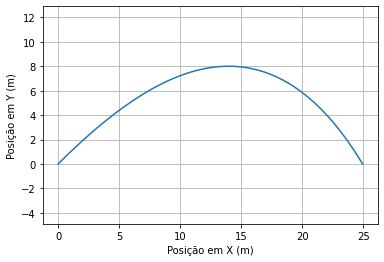

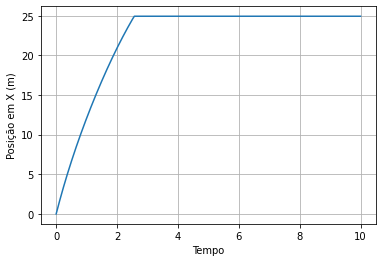

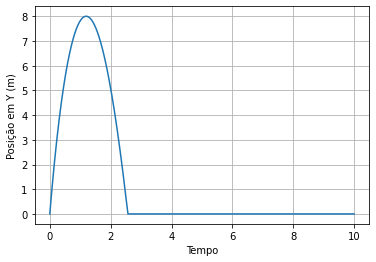

In [4]:
plt.plot(x_odeint, y_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.axis('equal')
plt.show()

plt.plot(lista_tempo, x_odeint)
plt.xlabel("Tempo")
plt.ylabel("Posição em X (m)")
plt.grid(True)
plt.show()

plt.plot(lista_tempo, y_odeint)
plt.xlabel("Tempo")
plt.ylabel("Posição em Y (m)")
plt.grid(True)
plt.show()

---
---
## Modelo considerando a rotação

---
### Código do modelo considerando a rotação:

In [5]:
def modelo2(lista, t):
    x, y, z, vx, vy, vz, r = lista[0], lista[1], lista[2], lista[3], lista[4], lista[5], lista[6]
    V = math.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    V2 = math.sqrt(vz ** 2 + vx ** 2)
    
    # Arrays para a força magnus
    Varray = np.array([vx, vy, vz])
    W = np.array([0, r, 0]) 
    
    # Forças magnus
    fmag = cl * math.pi * raio ** 3 * np.cross(W, Varray)    
    fmagx = fmag[0]
    fmagy = fmag[1]
    fmagz = fmag[2]
    
    # Senos e cossenos de teta e phi
    cosf = vy / V
    senf = V2 / V
    
    cost = vz / V2
    sent = vx / V2
    
    # Drag
    d = 1/2 * pa * A * cd * V ** 2
        
    # Equações de posição
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    # Equações de velocidade
    dvxdt = (1 / m) * (-d * senf * sent + fmagx)
    dvydt = (1 / m) * (-d * cosf - m * g + E + fmagy)
    dvzdt = (1 / m) * (-d * senf * cost + fmagz)
    
    # Equação da rotação
    drdt = 0
    
    if y < 0 or z < 0 or x < 0:
        return [0, 0, 0, 0, 0, 0, 0]
    
    lista_return = [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt, drdt]
    return lista_return

---
### Definindo parâmetros iníciais e rodando odeint:

In [6]:
# Parâmetros
dt = 3 * 10 ** -3
lista_tempo = np.arange(0, 30, dt)

# A massa, o A, a distancia e o raio são medidas minhas que provavelmente estão erradas
raio = 0.11
m = 0.4
A = math.pi * raio ** 2
pa = 1.225 # Densidade do ar
cd = 0.47 # Coeficiente de arrasto de uma esfera
distancia = 17.5 # Distância entre a trave e o escanteio
altura = 2.44 # Altura gol de futebol
g = 9.81
pb = 2
volume = 4 / 3 * math.pi * raio ** 3
cl = 1

    
# Empuxo
E = pa * volume * g

# Condições iniciais
x0 = 0
vx0 = 15
y0 = 0
vy0 = 14
z0 = 0
vz0 = 5
r0 = 300 / 30 * math.pi
ci = [x0, y0, z0, vx0, vy0, vz0, r0]

odeint_modelo = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_modelo[:,0]
y_odeint = odeint_modelo[:,1]
z_odeint = odeint_modelo[:,2]
vx_odeint = odeint_modelo[:,3]
vy_odeint = odeint_modelo[:,4]
vz_odeint = odeint_modelo[:,5]
r_odeint = odeint_modelo[:,6]

---
### Gráfico inicial para a validação:

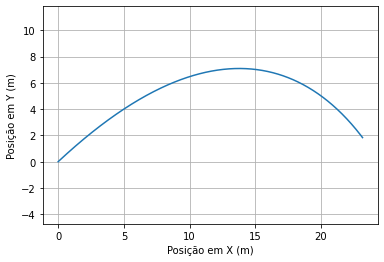

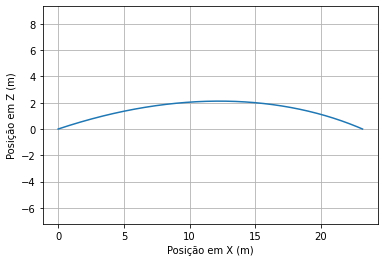

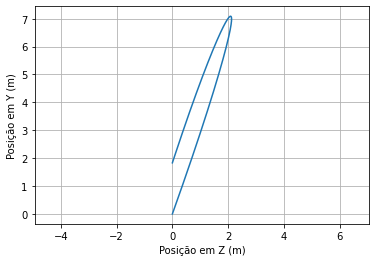

In [7]:
plt.plot(x_odeint, y_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Y (m)")
plt.axis('equal')
plt.grid(True)
plt.show()

plt.plot(x_odeint, z_odeint)
plt.xlabel("Posição em X (m)")
plt.ylabel("Posição em Z (m)")
plt.axis('equal')
plt.grid(True)
plt.show()

plt.plot(z_odeint, y_odeint)
plt.xlabel("Posição em Z (m)")
plt.ylabel("Posição em Y (m)")
plt.axis('equal')
plt.grid(True)
plt.show()

---
---
## Início de gráficos conclusivos
---

### Alterando a rotação inicial da bola:

In [8]:
lista_rotacoes = np.arange(250, 450, 5) / 30 * math.pi
lista_odeint = []
tempo_minimo = {}

for rotacao in lista_rotacoes:
    ci = [x0, y0, z0, vx0, vy0, vz0, rotacao]
    odeint_rotacao = odeint(modelo2, ci, lista_tempo)
    lista_odeint.append(odeint_rotacao)
    lista_odeint_x = list(odeint_rotacao[:,0])
    lista_odeint_y = list(odeint_rotacao[:,1])
    lista_odeint_z = list(odeint_rotacao[:,2])
    for i in range(len(lista_odeint_x)):
        # Se for maior que a distância salvar no dicionario
        if lista_odeint_x[i] > distancia and lista_odeint_z[i] <= 0 and  lista_odeint_y[i] < altura:
            tempo_minimo[rotacao] = lista_tempo[i]
            break
        elif lista_odeint_z[i] < 0 and lista_odeint_x[i] < distancia:
            tempo_minimo[rotacao] = -1
            break
        elif lista_odeint_z[i] < 0 and lista_odeint_x[i] > distancia or lista_odeint_x[i] < 0:
            tempo_minimo[rotacao] = -1
            break
        elif i == len(lista_odeint_x)-1:
            tempo_minimo[rotacao] = -1

rotacao_minima = 0
for rot, tempo in tempo_minimo.items():
    if rot > rotacao_minima and tempo != -1:
        rotacao_minima = rot
        menor_tempo = tempo

c:\Users\fefea\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


---
### Gráfico conclusivo da rotação pelo tempo mínimo para entrar no gol:

{26.179938779914945: -1, 26.703537555513243: -1, 27.227136331111538: -1, 27.75073510670984: -1, 28.274333882308138: -1, 28.797932657906436: -1, 29.321531433504738: 2.406, 29.845130209103033: 2.358, 30.36872898470133: 2.313, 30.892327760299633: 2.2680000000000002, 31.41592653589793: 2.226, 31.93952531149623: 2.184, 32.46312408709453: -1, 32.98672286269283: -1, 33.510321638291124: -1, 34.033920413889426: -1, 34.55751918948772: -1, 35.08111796508602: -1, 35.604716740684324: -1, 36.12831551628262: -1, 36.65191429188092: -1, 37.17551306747922: -1, 37.69911184307752: -1, 38.22271061867581: -1, 38.746309394274114: -1, 39.269908169872416: -1, 39.79350694547071: -1, 40.31710572106901: -1, 40.840704496667314: -1, 41.36430327226561: -1, 41.88790204786391: -1, 42.411500823462205: -1, 42.93509959906051: -1, 43.45869837465881: -1, 43.982297150257104: -1, 44.5058959258554: -1, 45.0294947014537: -1, 45.553093477052: -1, 46.0766922526503: -1, 46.6002910282486: -1}


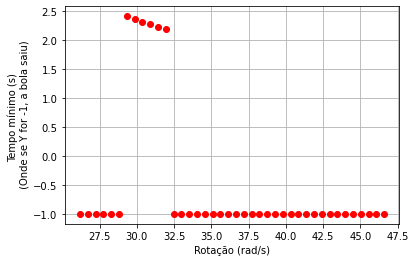

In [9]:
chaves = list(tempo_minimo.keys())
valores = list(tempo_minimo.values())

print(tempo_minimo)

plt.plot(chaves, valores, 'ro')
plt.xlabel("Rotação (rad/s)")
plt.ylabel("Tempo mínimo (s) \n (Onde se Y for -1, a bola saiu)")
plt.grid(True)
plt.show()

--- 
### Gráfico em 3d com a rotação inicial minima:

31.93952531149623
2.1967510336725344


C:\Users\fefea\AppData\Local\Temp/ipykernel_11512/2251952352.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


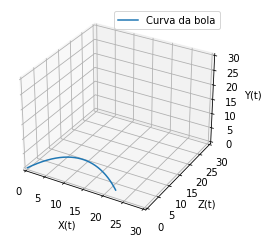

In [10]:
# Odeint da rotação certa
print(rotacao_minima)
ci = [x0, y0, z0, vx0, vy0, vz0, rotacao_minima] # Não é 500, valor arbitrario pra gerar o gráfico
odeint_rotacao = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_rotacao[:,0]
y_odeint = odeint_rotacao[:,1]
z_odeint = odeint_rotacao[:,2]

print(list(y_odeint)[-1])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.axes.set_xlim3d(left=0, right=30) 
ax.axes.set_ylim3d(bottom=0, top=30) 
ax.axes.set_zlim3d(bottom=0, top=30) 

ax.set_xlabel('X(t)')
ax.set_ylabel('Z(t)')
ax.set_zlabel('Y(t)')

ax.plot(x_odeint, z_odeint, y_odeint, label='Curva da bola')
ax.legend()

---
### Gráfico animado:

In [18]:
get_ipython().magic('matplotlib qt5')
%matplotlib qt5

# Odeint da rotação certa
ci = [x0, y0, z0, vx0, vy0, vz0, rotacao_minima] 
odeint_rotacao = odeint(modelo2, ci, lista_tempo)
x_odeint = odeint_rotacao[:,0]
y_odeint = odeint_rotacao[:,1]
z_odeint = odeint_rotacao[:,2]


def func(num, dataSet, line):
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line

dataSet = np.array([x_odeint, z_odeint, y_odeint])
numDataPoints = len(z_odeint)
 
# Criando os objetos de matplotlib
fig = plt.figure()
ax = Axes3D(fig)
 
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# Propriedades dos eixos
ax.axes.set_xlim3d(left=0, right=30) 
ax.axes.set_ylim3d(bottom=0, top=30) 
ax.axes.set_zlim3d(bottom=0, top=30) 
ax.set_xlabel('X(t)')
ax.set_ylabel('Z(t)')
ax.set_zlabel('Y(t)')
ax.set_title('Trajetória da bola')
 
# Criando o objeto da animação
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=1, blit=False)
'''f = r"c://Users/fefea/Desktop/animation.gif" 
writergif = animation.PillowWriter(fps=30) 
line_ani.save(f, writer=writergif)'''
 
 
plt.show()

C:\Users\fefea\AppData\Local\Temp/ipykernel_11512/2657197016.py:22: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
